<a href="https://colab.research.google.com/github/veeranna-spec/ADM_27/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import sklearn
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
diabetes = load_diabetes()

In [5]:
column_name = diabetes.feature_names
df_diabetes = pd.DataFrame(diabetes.data, columns=column_name)
df_diabetes.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


<Axes: ylabel='bmi'>

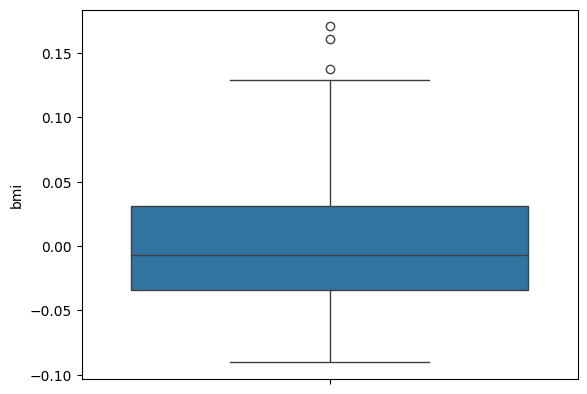

In [6]:

sns.boxplot(df_diabetes['bmi'])


In [19]:
def removal_box_plot(df, column, threshold):
  sns.boxplot(df[column])
  plt.title(f'Original Box Plot of {column}')
  plt.show()

  removed_outliers = df[df[column] <= threshold]

  sns.boxplot(removed_outliers[column])
  plt.title(f'Box Plot of {column} after removing outliers')
  plt.show()

  return removed_outliers




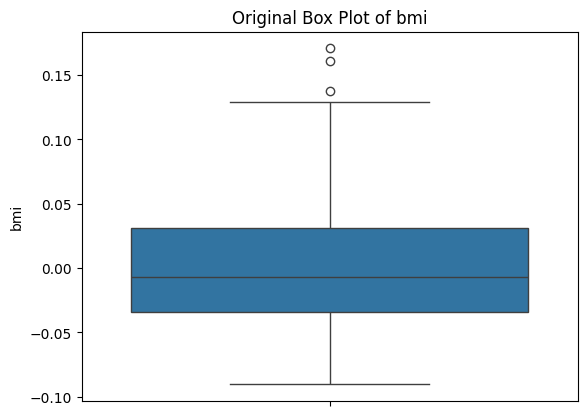

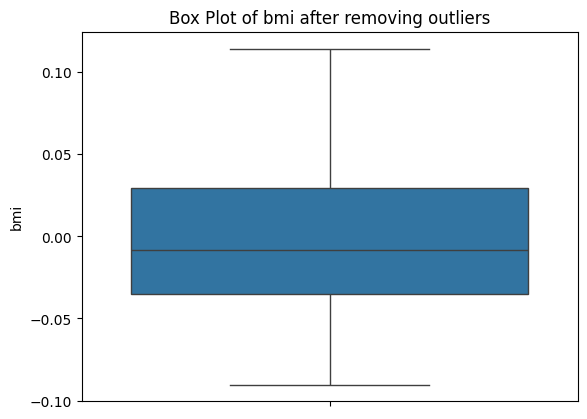

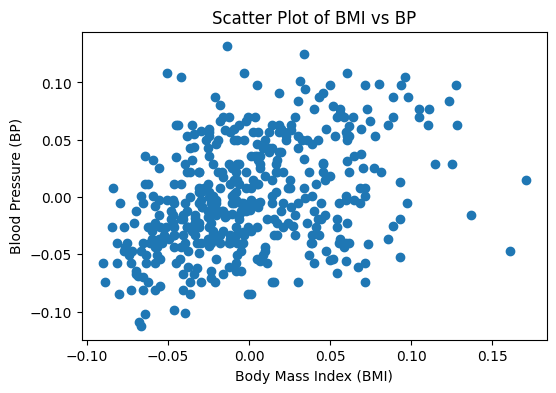

In [20]:
threshold_value = 0.12
no_outliers = removal_box_plot(df_diabetes, 'bmi', threshold_value)

fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df_diabetes['bmi'], df_diabetes['bp'])
ax.set_xlabel('Body Mass Index (BMI)')
ax.set_ylabel('Blood Pressure (BP)')
ax.set_title('Scatter Plot of BMI vs BP')
plt.show()



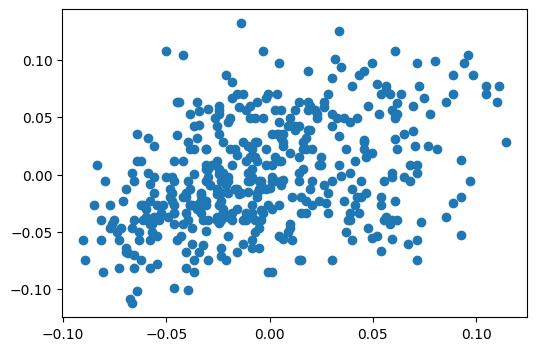

In [21]:
outlier_indics = np.where((df_diabetes['bmi'] > 0.12) & (df_diabetes['bp'] < 0.8))

no_outliers = df_diabetes.drop(outlier_indics[0])

fig, ax_no_outliers = plt.subplots(figsize=(6, 4))
ax_no_outliers.scatter(no_outliers['bmi'], no_outliers['bp'])
plt.show()

In [27]:
data=pd.read_csv('scores.csv')
data.sample(5)

,Emotional_Quotient,Intelligence_Quotient,Marks
13,73,151,74
24,64,147,69
78,90,160,95
43,81,135,84
51,77,129,76


Index(['Emotional_Quotient', 'Intelligence_Quotient', 'Marks'], dtype='object')


<ipython-input-29-e0b5b118b8fc>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.columns[0]])
<ipython-input-29-e0b5b118b8fc>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.columns[1]])
<ipython-input-29-e0b5b118b8fc>:12: UserWarning: 

`distplot` is a deprecated function 

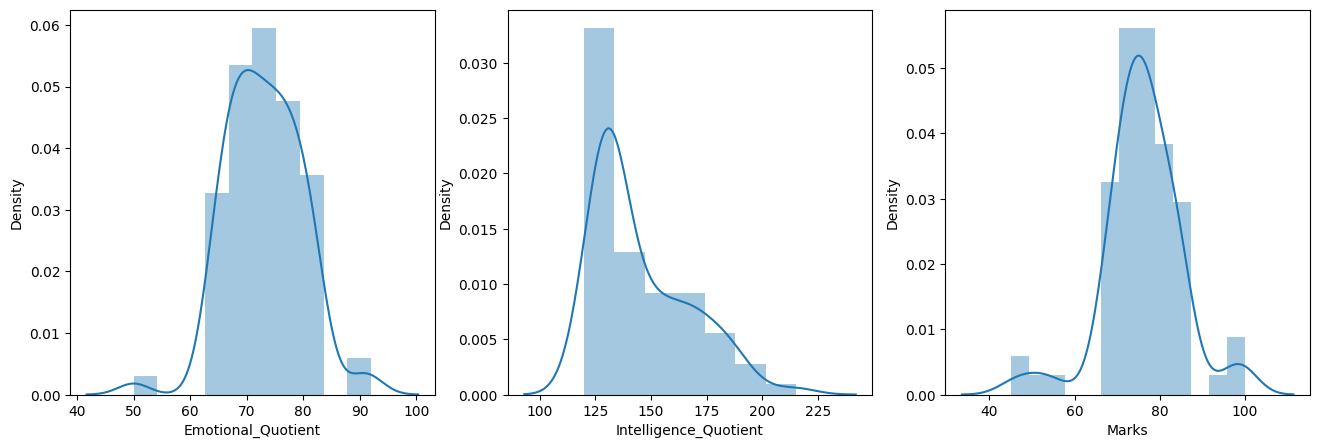

In [29]:
data=pd.read_csv('scores.csv')
data.sample(5)
data.shape
data.describe()
print(data.columns)
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.distplot(data[data.columns[0]])
plt.subplot(1,3,2)
sns.distplot(data[data.columns[1]])
plt.subplot(1,3,3)
sns.distplot(data[data.columns[2]])
plt.show()

In [30]:
z_score_upper_limit=data['Emotional_Quotient'].mean()+3*data['Emotional_Quotient'].std()
z_score_lower_limit=data['Emotional_Quotient'].mean()-3*data['Emotional_Quotient'].std()
z_score_upper_limit
z_score_lower_limit

53.108946316436615

In [32]:
data["Emotional_Quotient"]=np.where(data["Emotional_Quotient"]>z_score_upper_limit,
z_score_upper_limit,
np.where(
    data["Emotional_Quotient"]<z_score_lower_limit,
    z_score_lower_limit,
    data["Emotional_Quotient"]
)
)
data.describe()

data.describe()

,Emotional_Quotient,Intelligence_Quotient,Marks
count,80.000000,80.000000,80.000000
mean,73.163862,145.262500,76.062500
std,6.543434,21.560479,9.195959
min,53.108946,120.000000,45.000000
25%,68.000000,130.000000,72.000000
50%,73.000000,135.000000,76.000000
75%,78.000000,160.250000,81.250000
max,92.000000,215.000000,100.000000


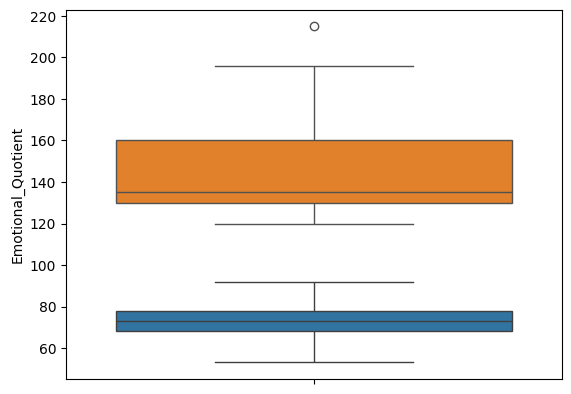

In [33]:
sns.boxplot(data['Emotional_Quotient'])
data['Intelligence_Quotient'].skew()
sns.boxplot(data['Intelligence_Quotient'])
percentile25=data['Intelligence_Quotient'].quantile(0.25)
percentile75=data['Intelligence_Quotient'].quantile(0.75)

In [34]:
percentile75
iqr=percentile75-percentile25
iqr
iqr_upper_limit=percentile75+1.5*iqr
iqr_lower_limit=percentile25-1.5*iqr
print("Upper Limit",iqr_upper_limit)
print("Lower Limit",iqr_lower_limit)

Upper Limit 205.625
Lower Limit 84.625
